## Visual analysis of synthetic data

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
from data_loading import data_from_file, synt_data_from_file



#### Importing data from csv-file to a dataframe

<Axes: >

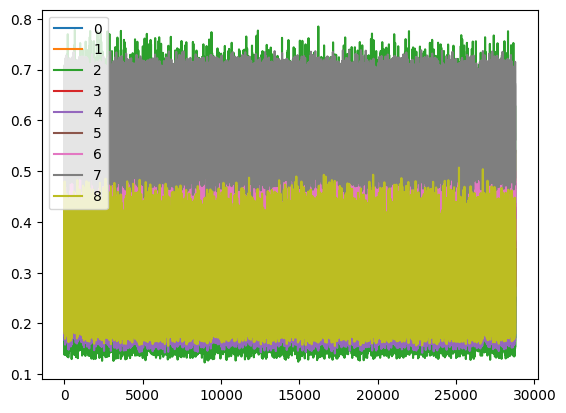

In [7]:
ori_data_file = 'sensor_data_norm2_indexless_10days.csv'
ori_data = data_from_file(ori_data_file)
# ori_data.plot()

synt_data_file = 'gen_data_norm_indexless.csv'
synt_data = synt_data_from_file(synt_data_file)
synt_data.plot()

#### Generating random data to use as control samples

In [31]:
rand_data = pd.DataFrame(np.random.normal(0, 0.1, ori_data.shape))
rand_data.shape

(28800, 9)

#### PCA

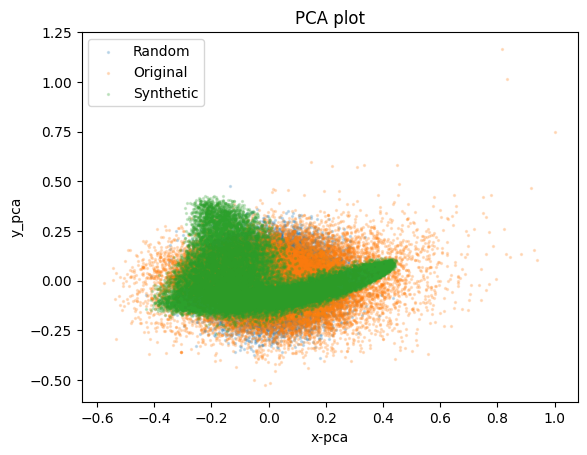

In [35]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

pca_ori_data = pca.fit_transform(ori_data)
pca_synt_data = pca.fit_transform(synt_data)
pca_rand_data = pca.fit_transform(rand_data)

# pca_ori_data = preprocessing.normalize(pca_ori_data, axis=0)
# pca_synt_data = preprocessing.normalize(pca_synt_data, axis=0)


# print(type(pca_ori_data))
pca_ori_df = pd.DataFrame(data = pca_ori_data
             , columns = ['x', 'y'])
pca_synt_df = pd.DataFrame(data = pca_synt_data
             , columns = ['x', 'y'])
pca_rand_df = pd.DataFrame(data = pca_rand_data
             , columns = ['x', 'y'])


# Plotting
marker = "o"
size = 2
f, ax = plt.subplots(1)    
plt.scatter(pca_rand_df['x'], pca_rand_df['y'], alpha = 0.2, label = "Random", marker=marker, s=size)
plt.scatter(pca_ori_df['x'],pca_ori_df['y'], alpha = 0.2, label = "Original", marker=marker, s=size)
plt.scatter(pca_synt_df['x'], pca_synt_df['y'], alpha = 0.2, label = "Synthetic", marker=marker, s=size)

ax.legend()  
plt.title('PCA plot')
plt.xlabel('x-pca')
plt.ylabel('y_pca')
plt.show()


#### T-SNE

In [36]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_ori_data = tsne.fit_transform(ori_data)
tsne_synt_data = tsne.fit_transform(synt_data)
tsne_rand_data = tsne.fit_transform(rand_data)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

tsne_ori_df = pd.DataFrame(data = tsne_ori_data
             , columns = ['x', 'y'])
tsne_synt_df = pd.DataFrame(data = tsne_synt_data
             , columns = ['x', 'y'])
tsne_rand_df = pd.DataFrame(data = tsne_rand_data
             , columns = ['x', 'y'])


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 28800 samples in 0.055s...
[t-SNE] Computed neighbors for 28800 samples in 4.652s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28800
[t-SNE] Computed conditional probabilities for sample 2000 / 28800
[t-SNE] Computed conditional probabilities for sample 3000 / 28800
[t-SNE] Computed conditional probabilities for sample 4000 / 28800
[t-SNE] Computed conditional probabilities for sample 5000 / 28800
[t-SNE] Computed conditional probabilities for sample 6000 / 28800
[t-SNE] Computed conditional probabilities for sample 7000 / 28800
[t-SNE] Computed conditional probabilities for sample 8000 / 28800
[t-SNE] Computed conditional probabilities for sample 9000 / 28800
[t-SNE] Computed conditional probabilities for sample 10000 / 28800
[t-SNE] Computed conditional probabilities for sample 11000 / 28800
[t-SNE] Computed conditional probabilities for sample 12000 / 28800
[t-SNE] Computed conditional probabilities for sa

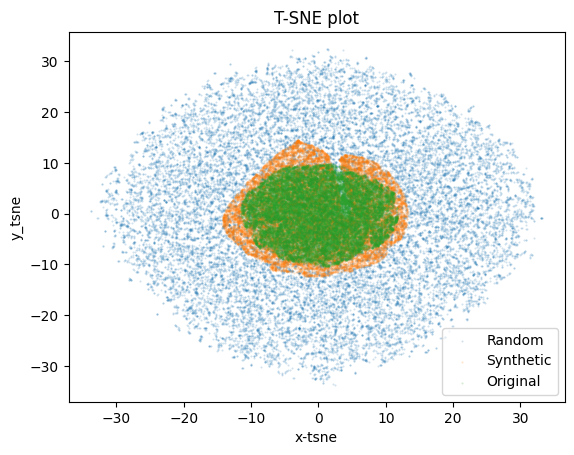

In [37]:
# Plotting
marker = "."
size = 1
f, ax = plt.subplots(1)    
plt.scatter(tsne_rand_df['x'], tsne_rand_df['y'], alpha = 0.2, label = "Random", marker=marker, s=size)
plt.scatter(tsne_synt_df['x'], tsne_synt_df['y'], alpha = 0.2, label = "Synthetic", marker=marker, s=size)
plt.scatter(tsne_ori_df['x'],tsne_ori_df['y'], alpha = 0.2, label = "Original", marker=marker, s=size)

ax.legend()  
plt.title('T-SNE plot')
plt.xlabel('x-tsne')
plt.ylabel('y_tsne')
plt.show()